## 1 Data Aggregation

### 1.1 Introduction

So far, we've learned how to use the **pandas library** with data sets that didn't require much cleanup. However, most data sets in real life require extensive cleaning and manipulation to extract any meaningful insights. In fact, [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#422844586f63) estimates that data scientists spend about 60% of their time cleaning and organizing data, so it's critical to be able to manipulate data quickly and efficiently.

In the next four or five lessons, we'll learn the following:

- Data aggregation
- How to combine data
- How to transform data
- How to clean strings with pandas
- How to handle missing and duplicate data


In that lessons, we'll work with the **World Happiness Report**, an annual report created by the **UN Sustainable Development Solutions Network** with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including **economic production**, **social support**, **life expectancy**, **freedom**, **absence of corruption**, and **generosity**, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Throughout that lessons, we'll work to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

In this first part of lesson, we'll start by learning how to **aggregate data**. Then, we'll learn different data cleaning skills that can help us aggregate and analyze the data in different ways. We'll start by learning each topic in isolation, but build towards a more complete data cleaning workflow by the end of the next four or five lessons.

### 1.2 Introduction to the Data

Let's start by looking at the World Happiness Report for 2015. You can find the data [here](https://www.kaggle.com/unsdsn/world-happiness).

Below is a preview of the data set:

| | Country | Region | Happiness Rank | Happiness Score | Standard Error | Economy (GDP per Capita) | Family | Health (Life Expectancy) | 
|---------|-------------|----------------|-----------------|----------------|--------------------------|---------|--------------------------|---------|
| 0 | Switzerland | Western Europe | 1 | 7.587 | 0.03411 | 1.39651 | 1.34951 | 0.94143 |
| 1 | Iceland | Western Europe | 2 | 7.561 | 0.04884 | 1.30232 | 1.40223 | 0.94784 |
| 2 | Denmark | Western Europe | 3 | 7.527 | 0.03328 | 1.32548 | 1.36058 | 0.87464 |
| 3 | Norway | Western Europe | 4 | 7.522 | 0.03880 | 1.45900 | 1.33095 | 0.88521 |
| 4 | Canada | North America | 5 | 7.427 | 0.03553 | 1.32629 | 1.32261 | 0.90563 |

The data set is a CSV file called **World_Happiness_2015.csv**. Below are descriptions for some of the columns we'll be working with:

- **Country** - Name of the country.
- **Region** - Name of the region the country belongs to.
- **Happiness Rank** - The rank of the country, as determined by its happiness score.
- **Happiness Score** - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- **Family** - The estimated extent to which family contributes to the happiness score.
- **Freedom** - The estimated extent to which freedom contributes to the happiness score.
- **Generosity** - The estimated extent to which generosity contributes to the happiness score.

To start, let's read our data set into a pandas dataframe and inspect it.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Use the **pd.read_csv()** function to read the **World_Happiness_2015.csv** file into a dataframe called **happiness2015**.
- Store the first five rows of the dataframe in a variable called **first_5**.
- Use the **DataFrame.info()** method to store information about the dataframe in a variable called **info**.


In [36]:
import pandas as pd
import numpy as np

In [3]:
# put your code here
happiness2015 = pd.read_csv('World_Happiness_2015.csv')

first_5 = happiness2015.head()
info = happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [4]:
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
info

### 1.3 Using Loops to Aggregate Data

First, let's visualize the happiness score of each country in **happiness2015**:





In [7]:
import matplotlib.pyplot as plt
happiness2015['Happiness Score'].plot(kind='bar', 
                                      title='Happiness Scores',
                                      ylim=(0,10))
plt.show()

<Figure size 640x480 with 1 Axes>

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the happiness2015 dataframe is assigned to a **region**, specified in the **Region** column. We can use the **Series.unique()** method to confirm the unique regions:



In [8]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try plotting just one region next:

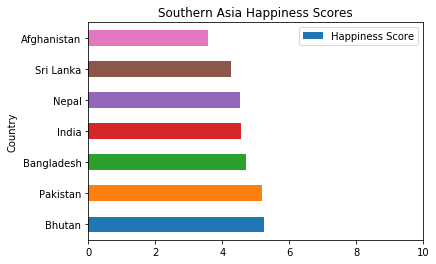

In [9]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country',
             y='Happiness Score', 
             kind='barh', 
             title='Southern Asia Happiness Scores', 
             xlim=(0,10))
plt.show()

It's much easier to read this visualization - we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions. What we really want is to create a visualization that uses one number, a summary statistic like the mean, to summarize the data for each region.

<left><img width="500" src="https://drive.google.com/uc?export=view&id=1hAGXGQD52Az6I0ESC06eB-F9vwVFcQUH"></left>

In this lesson, we'll learn how to perform different kinds of **aggregations**, applying a statistical operation to groups of our data, and create visualizations like the one above.

Recall that in the **Pandas Fundamentals lessons**, we learned a way to use loops for aggregation. Our process looked like this:

- Identify each unique group in the data set.
- For each group:
  - Select only the rows corresponding to that group.
  - Calculate the average for those rows.

Let's use the same process to find the mean happiness score for each region.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Create an empty dictionary named **mean_happiness** to store the results of this exercise.
- Use the **Series.unique()** method to create an array of unique values for the Region column.
- Use a for loop to iterate over the unique region values from the **Region** column.
  - Assign the rows belonging to the current region to a variable named **region_group**.
  - Use the **Series.mean()** method to calculate the mean happiness score for **region_group**.
  - Assign the **mean** value to the **mean_happiness** dictionary, using the **region name** as the **key** and the **mean happiness** score as the **value**.

In [11]:
# put your code here
mean_happiness = {}

for region in happiness2015['Region'].unique():
    region_group = happiness2015[ happiness2015.Region == region ]
    mean_happiness[region] = region_group['Happiness Score'].mean()

In [12]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

### 1.4 The GroupBy Operation

Let's break down the code we wrote in the previous section into three steps:

- Split the dataframe into groups.
- Apply a function to each group.
- Combine the results into one data structure.

In [13]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

<left><img width="800" src="https://drive.google.com/uc?export=view&id=1Ct5QoT7yte-NABSqTJVaCqyfd4YIVcUz"></left>

As with many other common tasks, pandas has a built-in operation for this process. The [groupby operation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

- Create a GroupBy object.
- Call a function on the GroupBy object.

The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

You can think of the **groupby** operation like this. Imagine a dataframe as a structure made of stacking blocks in all different colors and sizes.

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1av5ulwcPgJ9pYaUNg6GWmlS5hIPIUc9a"></left>


You know you'll eventually want to group the blocks according to color instead, but you don't know yet what you want to do with them after. Using the groupby process, we would first create a mapping document, the **GroupBy** object, containing information on how to group the blocks by color and where each block is located in the original structure.

<left><img width="300" src="https://drive.google.com/uc?export=view&id=1hjjpvG7WDzus9CShLGtzOv4MTvQooeBG"></left>

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.

<left><img width="300" src="https://drive.google.com/uc?export=view&id=1aUkogBQd30RTfV-RC45w1ht3w-x9Nld0"></left>

Then, he or she asks us to build another structure using the block size the appears most frequently in each color.


<left><img width="300" src="https://drive.google.com/uc?export=view&id=17H8cMLKjX535hhIYGJKvOKCT_GQd8Qjo"></left>

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the **groupby** operation, we make our code faster, more flexible, and easier to read.

### 1.5 Creating GroupBy Objects

The first step in the groupby operation is to create a GroupBy object:

<left><img width="500" src="https://drive.google.com/uc?export=view&id=1QwWrh1Ry0grtGtBkC9Nj9IMxkypYXypA"></left>

To create a GroupBy object, we use the [DataFrame.groupby()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) method:

```python
df.groupby('col')
```

where **col** is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the **DataFrame.groupby()** method. However, for teaching purposes, we'll focus on grouping the data by just one column in this lesson.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.

<left><img width="700" src="https://drive.google.com/uc?export=view&id=1D41O6Wo_6CrS20ptrRl2q5iBFDWb1ulR"></left>

We can see from the couple of rows above that the **Region** column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire dataframe with the **Series.value_counts()** method next:

In [14]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Since there's a small number of groups and each group contains more than one unique value, we can confirm the **Region** column is a good candidate to group by.

Next, let's create a Groupby object and group the dataframe by the **Region** column:

In [15]:
happiness2015.groupby('Region')

Don't be alarmed! This isn't an error. This is telling us that an object of type **GroupBy** was returned, just like we expected.

Before our we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the **GroupBy.get_group()** method to select data for a certain group.

As an example, to select the data for just the **North America** group, we'd pass 'North America' into the **get_group()** method as follows:



In [16]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011



**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Use the **df.groupby()** method to group **happiness2015** by the **Region** column. Assign the result to **grouped**.
- Use the **GroupBy.get_group()** method to select the data for the **Australia and New Zealand** group only. Assign the result to **aus_nz**.

In [17]:
# put your code here
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

In [18]:
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### 1.6 Exploring GroupBy Objects

We can also use the GroupBy.groups attribute to get more information about the GroupBy object:


In [19]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

The result is a dictionary in which each key corresponds to a region name. 

Notice that the values include the index for each row in the original **happiness2015** dataframe with the corresponding region name. To prove this, let's again look at the data for the **Australia and New Zealand** group:

```python
'Australia and New Zealand': Int64Index([8, 9], dtype='int64')
```




Then, let's filter on indexes 8 and 9 in **happiness2015**:


In [20]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


And we see that those rows correspond to Australia and New Zealand! Notice that the **get_group()** method also returned the same dataframe above.

Next, let's continue building our intuition by practicing using the groups attribute and **get_group()** method.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


For the following exercise, use the result from the dictionary returned by grouped.groups shown below:

```python
'North America': Int64Index([4, 14], dtype='int64'
```

- Prove that the values for the **'North America'** group in the dictionary returned by **grouped.groups** above correspond to countries in **North America** in the **happiness2015** dataframe.
  - Use the snippet above to identify the indexes of the countries in **happiness2015** that belong to the **North America** group.
  - Use the indexes to assign just the countries in North America in **happiness2015** to **north_america**.
- Use the **GroupBy.get_group()** method to select the data for the North America group only. Assign the result to **na_group**.
- Set **north_america** equal to **na_group**. Assign the result to **equal**.

In [22]:
grouped = happiness2015.groupby('Region')
# put your code here
north_america = happiness2015.iloc[[4,14], :]

In [23]:
north_america

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [24]:
na_group = happiness2015.groupby('Region').get_group('North America')

In [25]:
equal = north_america == na_group

In [26]:
equal

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


### 1.7 Common Aggregation Methods with Groupby

Now that we have a good understanding of GroupBy objects, let's use them to aggregate our data. In order to aggregate our data, we must call a function on the GroupBy object.

A basic example of aggregation is computing the number of rows for each of the groups. We can use the **GroupBy.size()** method to confirm the size of each region group:

In [27]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Notice that the result is a Series and contains just one value for each group. Each value represents the number of rows in each group. For example, the 'Australia and New Zealand' group contains two rows.

Pandas has built in a number of other common [aggregation methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):

| Methods | Description |
|---------|-------------------------------------------|
| mean() | Calculates the mean of groups. |
| sum() | Calculates the sum of group values. |
| size() | Calculates the size of the groups. |
| count() | Calculates the count of values in groups. |
| min() | Calculates the minimum of group values. |
| max() | Calculates the maximum of group values. |

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Apply the **GroupBy.mean()** method to **grouped**. Assign the result to **means**.

In [28]:
# put your code here

means = grouped.mean()

In [29]:
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


### 1.8 Aggregating Specific Columns with Groupby

You may have noticed that **Region** appears in a different row than the rest of the column names. Because we grouped the dataframe by region, the unique values in **Region** are used as the index. Up until now, we've mostly worked with dataframes with a numeric index.

<left><img width="500" src="https://drive.google.com/uc?export=view&id=1EXmHZtkiKiTS0De2LbSrsHO3YPrQAX2n"></left>

In some cases, we may only wish to aggregate one particular column in the original dataframe. GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe:


| Select by Label | Syntax |
|-----------------|---------------------------|
| Single column | GroupBy["col1"] |
| List of columns | GroupBy[["col1", "col2"]] |

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Select just the **Happiness Score** column from **grouped**. Assign the result to **happy_grouped**.
- Use the **GroupBy.mean()** method to compute the mean of **happy_grouped**. Assign the result to **happy_mean**.

In [34]:
grouped = happiness2015.groupby('Region')
# put your code here

happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

In [35]:
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

### 1.9 Introduction to the Agg() Method

We learned in the last exercise that we can use indexing to aggregate just one column at a time.

However, what if we wanted to apply more than one kind of aggregation to a column at a time?

For example, suppose we wanted to calculate both the mean and maximum happiness score for each region. Using what we learned so far, we'd have to first calculate the mean, like we did above, and then calculate the maximum separately.

Luckily, however, the [GroupBy.agg() method](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) can perform both aggregations at once. We can use the following syntax:

<left><img width="400" src="https://drive.google.com/uc?export=view&id=1zP3hrTHmkLCl42BHrSlgZ-ZbB23NK99b"></left>

Note that when we pass the functions into the **agg()** method as arguments, we don't use parentheses after the function names. For example, when we use **np.mean**, we refer to the function object itself and treat it like a variable, whereas **np.mean()** would be used to call the function and get the returned value.

The function names can also be passed in as strings, but we won't cover that explicitly in this lesson. You can refer to this [documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html) for more information on this topic.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Apply the **GroupBy.agg()** method to **happy_grouped**. Pass a list containing **np.mean** and **np.max** into the method. Assign the result to **happy_mean_max**.
- As noted above, passing **'mean'** and **'max'** into the **GroupBy.agg()** method will also return the same results. 

In [37]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
#put your code here

happy_mean_max = happy_grouped.agg([np.mean, np.max])

In [38]:
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


### 1.10 Computing Multiple and Custom Aggregations with the Agg() Method

In the last exercise, we learned we can use the **GroupBy.agg()** method to:

- Perform more than one aggregation at once.
- Compute custom aggregations.

To compute multiple aggregations at once, we passed a list of the function names into the **agg** method.

The result was a dataframe containing both the **mean** and **maximum** happiness scores for each region. Note that the columns are named for the functions themselves. Because **np.max** is an alias for **np.amax**, the column for the maximum is named **amax**.

We also used a custom function to aggregate the data:



In [39]:
def dif(group):
    return(group.max() - group.mean())
happy_grouped.agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Above, we calculated the difference between the mean and maximum values for each region. Because the **agg()** method allows us to create custom aggregation functions, it gives us much more flexibility in how we can transform our data.

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, if you read through other teaching resources, you may see instances in which the statements are combined:



In [40]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, it's recommended to save the object to a variable first. You may wish to save it to a variable in all cases to make your code easier to understand. As we compute more complex aggregations, the syntax can get confusing!


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

Inspect the following code: 

```python
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
```

- If we run the code above, will the index of **happiness_means** be the unique values in the **Region column** or the **Happiness Score** column?
- Will the values aggregated in **happiness_means** be the values from the **Region** column or the **Happiness Score** column?
- Print **happiness_means**. Were your predictions correct?

In [41]:
# put your code here

happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

In [42]:
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

### 1.11 Aggregation with Pivot Tables

In the last exercise, we tried to predict the results of the code below:

```python
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
```

When you printed **happiness_means**, you should've seen that the values in the **Region** column are the index of the resulting dataframe and the **Happiness Score** column contained the values that would be aggregated:

<left><img width="400" src="https://drive.google.com/uc?export=view&id=1HBmWSulMbvUhUohOLDA0bG0BTgcoYP2L"></left>


**Index** and **values** are actually arguments used in another method used to aggregate data - the [DataFrame.pivot_table()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) method. This **df.pivot_table()** method can perform the same kinds of aggregations as the **df.groupby** method and make the code for complex aggregations easier to read.

If you're an Excel user, you may have already drawn comparisons between the groupby operation and Excel pivot tables. If you've never used Excel, don't worry! No prior knowledge is needed for this lesson. We'll demonstrate the **pivot_table()** method next.

Below, we use the **df.pivot_table()** method to perform the same aggregation as above.


In [43]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Keep in mind that this method returns a **dataframe**, so normal dataframe filtering and methods can be applied to the result. For example, let's use the **DataFrame.plot()** method to create a visualization. Note that we exclude **aggfunc** below because the mean is the default aggregation function of **df.pivot_table()**

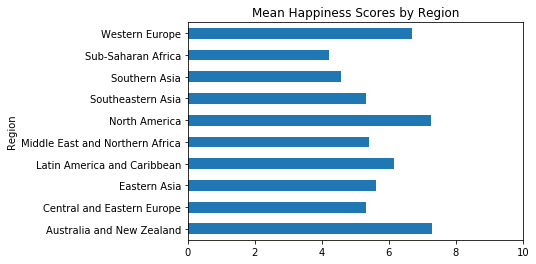

In [44]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', 
                  title='Mean Happiness Scores by Region', 
                  xlim=(0,10), legend=False)
plt.show()


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

We've already updated **pv_happiness** by setting the **margins** parameter equal to **True**.
  - Plot the resulting dataframe, **pv_happiness**, using the **df.plot()** method. Set kind to **barh**, **xlim** to (0,10), **title** to **'Mean Happiness Scores by Region'**, and **legend** to **False**. What do you notice about this results?
- Calculate the **mean** of the **Happiness Score** column in the original happiness 2015 data set. Assign the result to **world_mean_happiness**.
- Does **world_mean_happiness** equal the value for the **All** group? If you can't figure out the answer, don't worry! We'll review this question on the next section.

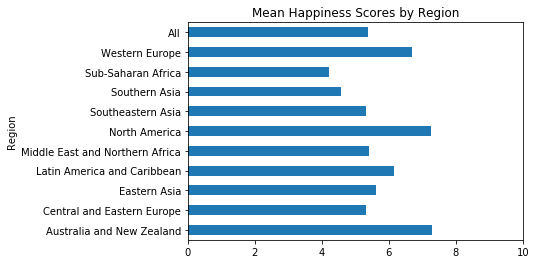

In [46]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score',
                                         index='Region', 
                                         aggfunc=np.mean, 
                                         margins=True)
# put your code here
pv_happiness.plot(kind='barh', 
                  xlim=(0,10), 
                  title='Mean Happiness Scores by Region',
                  legend= False)

In [47]:
world_mean_happiness = happiness2015['Happiness Score'].mean()
world_mean_happiness

5.37573417721519

### 1.12. Aggregating Multiple Columns and Functions with Pivot Tables

In the last exercise, we learned that when we set the margins parameter equal to **True**, **All** will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, **All** is the **mean** of the **Happiness Score** column.

<left><img width="500" src="https://drive.google.com/uc?export=view&id=1Ur0vwBw3xOqrEnaEYhqj1jWJjvtjQkSv"></left>


The **pivot_table** method also allows us to aggregate multiple columns and apply multiple functions at once.

Below, we aggregate both the **'Happiness Score'** and **'Family'** columns in **happiness2015** and group by the **'Region'** column:



In [48]:
happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


To apply multiple functions, we can pass a list of the functions into the **aggfunc** parameter:

In [49]:
happiness2015.pivot_table('Happiness Score', 'Region', 
                          aggfunc=[np.mean, np.min , np.max], 
                          margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


Let's compare the results returned by the **groupby** operation and the **pivot_table** **bold text** method next.


<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Use the **df.groupby()** method to calculate the **minimum**, **maximum**, and **mean** family and happiness scores for each region in **happiness2015**.
  - Group **happiness2015** by the **Region** column.
  - Select the **Happiness Score** and **Family** columns. Assign the result to **grouped**.
  - Apply the **GroupBy.agg()** method to **grouped**. Pass a list containing **np.min**, **np.max**, and **np.mean** into the method.
  - Assign the result to **happy_family_stats**.
- Use the **pivot_table** method to return the same information, but also calculate the the minimum, maximum, and mean for the entire **Family** and **Happiness Score** columns.
  - The aggregation columns should be **Happiness Score** and **Family**.
  - The column to group by is **Region**.
  - The aggregation functions are **np.min**, **np.max**, and **np.mean**.
  - Set the margins parameter equal to **True**.
  - Assign the result to **pv_happy_family_stats**.

In [50]:
# put your code here
grouped = happiness2015.groupby('Region')['Happiness Score','Family']
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

In [51]:
happy_family_stats

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [54]:
pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region', 
                                                  aggfunc=[np.min, np.max, np.mean],
                                                  margins=True)

In [55]:
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

### 1.13 Next Steps

In this lesson, we learned how to use the groupby operation and the **df.pivot_table()** method for aggregation. In the next lesson, we'll learn how to combine data sets using the **pd.concat()** and **pd.merge()** functions.